In [40]:
#Player stats
# Get all player stats for each year
from nba_api.stats.static import players
from nba_api.stats.endpoints import playergamelog, playercareerstats, playercareerstats, playergamelogs

import numpy as np
import pandas as pd


In [29]:
# TODO Find efficient weight paramater (ELO) to be used in linear regression
# TODO plot data, linear regression may not capture much data due to distribition
# TODO plot player and game data with various plots (list of plots on note)


In [30]:
players = pd.DataFrame(pd.read_csv("players.csv"))


def find_player_id(player_full_name):
    for i in range(0, len(players)):
        player = players.iloc[i]
        if player["full_name"] == player_full_name:
            return player['id']

def get_players_for_season(season_start):
    file_location = "../player_season/player_season_data/season_year_start_player_data_" + str(season_start)
    season = pd.read_csv(file_location)
    players_id = season['PLAYER_ID'].drop_duplicates()
    
    return players_id

        
def get_player_stat_for_season(player_id,  season_start, player_name = None):
    # check if player played for that season.
    # if not played return program with error
    
    file_location = "../player_season/player_season_data/season_year_start_player_data_" + str(season_start)
    season = pd.read_csv(file_location)
    return(season)



def get_stat_for_player(season, player_id):
     player_stat = season[season['PLAYER_ID'] == player_id]        
     return player_stat
             
# data frame object
# Lebron test
# player_season_stat = get_stat_for_player(get_player_stat_for_season(player_id=find_player_id("LeBron James"), season_start="2014"),player_id=find_player_id("LeBron James"))




# function that checks which players played that season. So just count unique name/unique player ID and sum them up





In [48]:
# data preprocessing and cleaning and analysis

# for every player_stat_object 

# add column for team versed
# go through every row and after very 'vs' find the teamId and column (against team column)
# might not need cause data is already connected through gameID

# TODO Dealing with N/A values with old data
# TODO probably better of just deleting rows with N/A values 
# TODO maube estimate


# read from a player csv file or from a function
player_season_stat = pd.read_csv("lebron_test_file.csv")

player_season_stat = player_season_stat.drop('TEAM_NAME', axis=1)
player_season_stat = player_season_stat.drop('PLAYER_NAME', axis=1)
player_season_stat = player_season_stat.drop('NICKNAME', axis=1)
player_season_stat = player_season_stat.drop('TEAM_ABBREVIATION', axis=1)
player_season_stat = player_season_stat.drop('WNBA_FANTASY_PTS_RANK', axis=1)
player_season_stat = player_season_stat.drop('NBA_FANTASY_PTS_RANK', axis=1)
player_season_stat = player_season_stat.drop('NBA_FANTASY_PTS', axis=1)
player_season_stat = player_season_stat.drop('WNBA_FANTASY_PTS', axis=1)
# Maybe keep season year
player_season_stat = player_season_stat.drop('SEASON_YEAR', axis=1)
player_season_stat = player_season_stat.drop('Unnamed: 0.1', axis=1)
player_season_stat = player_season_stat.drop('Unnamed: 0', axis=1)
player_season_stat['GAME_DATE'] = pd.to_datetime(player_season_stat['GAME_DATE'])


# drop MIN_SEC since it is an object 
player_season_stat = player_season_stat.drop('MIN_SEC', axis=1)




def home_away_map(x):
    try:
        index = x.index('@')
        return 0
    except ValueError:
        return 1


from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
player_season_stat['WL'] = lb.fit_transform(player_season_stat['WL'])
player_season_stat['MATCHUP'] =  player_season_stat['MATCHUP'].map(home_away_map)
print(player_season_stat.info())
player_season_stat.to_csv('lebron_proccessed_test_file.csv')




# choose columsn to standardise.


# move Win lose column to first column.
# plot adn see 










<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 59 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   PLAYER_ID        69 non-null     int64         
 1   TEAM_ID          69 non-null     int64         
 2   GAME_ID          69 non-null     int64         
 3   GAME_DATE        69 non-null     datetime64[ns]
 4   MATCHUP          69 non-null     int64         
 5   WL               69 non-null     int64         
 6   MIN              69 non-null     float64       
 7   FGM              69 non-null     int64         
 8   FGA              69 non-null     int64         
 9   FG_PCT           69 non-null     float64       
 10  FG3M             69 non-null     int64         
 11  FG3A             69 non-null     int64         
 12  FG3_PCT          69 non-null     float64       
 13  FTM              69 non-null     int64         
 14  FTA              69 non-null     int64      

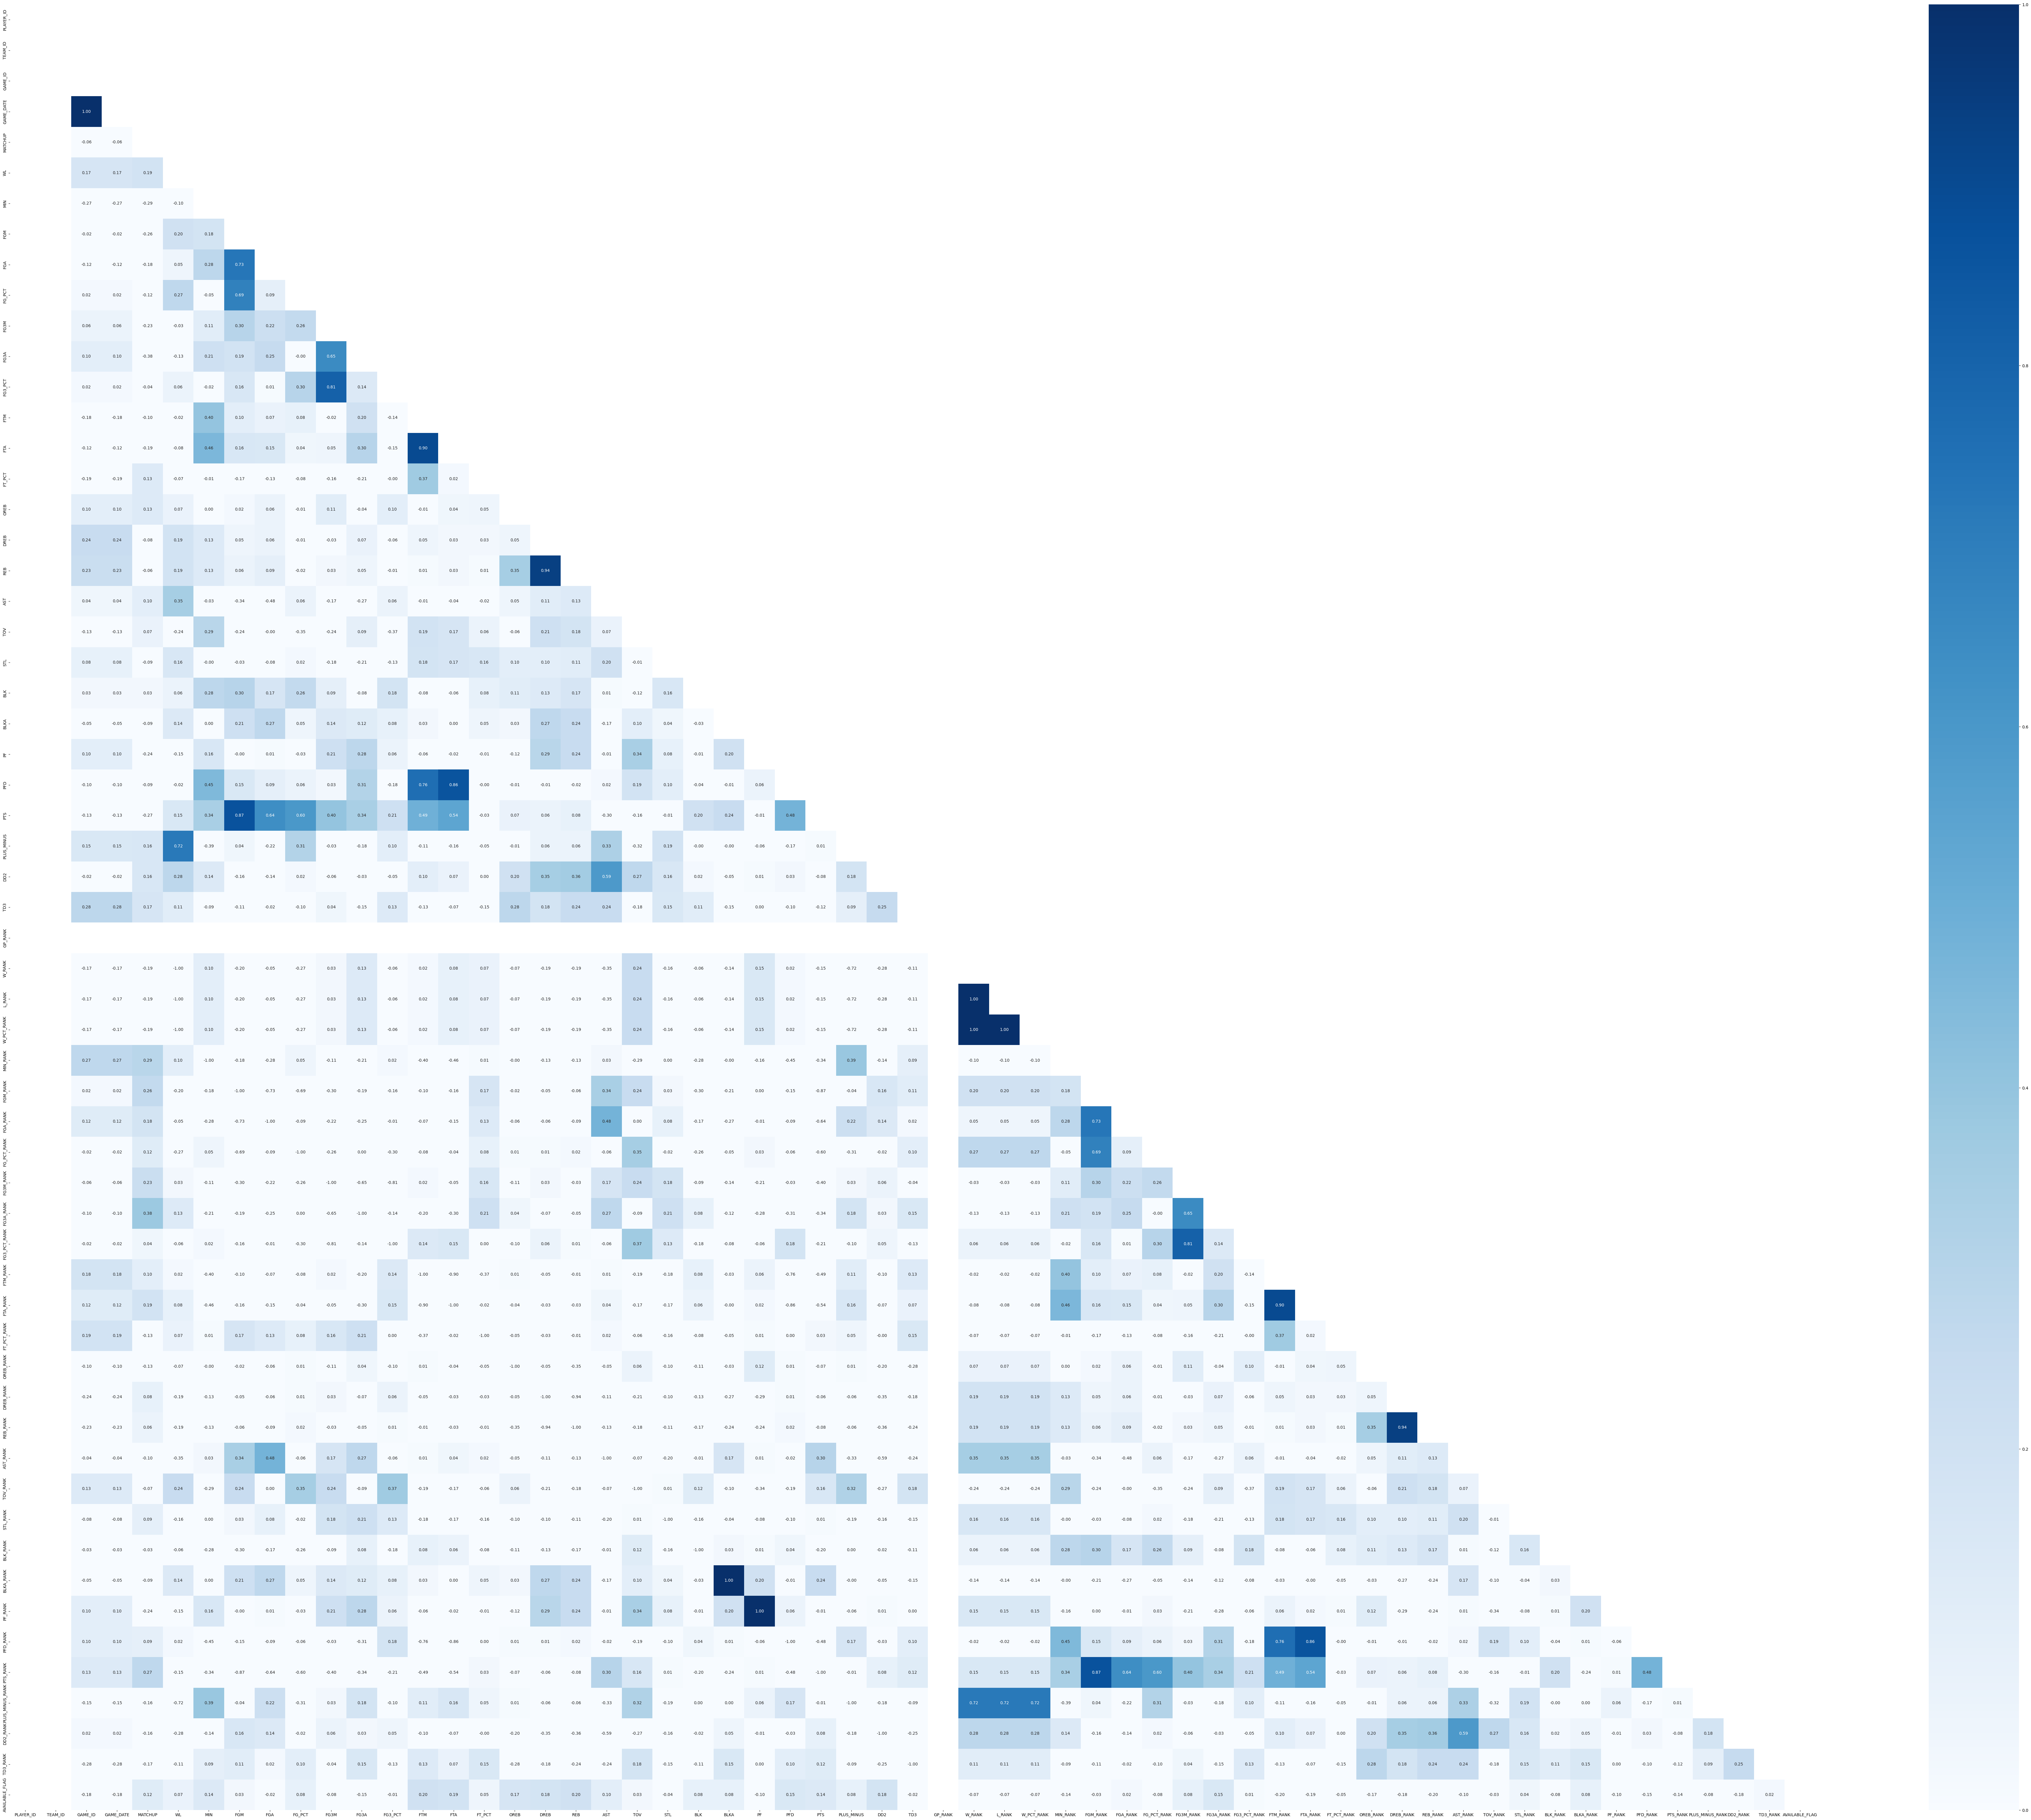

In [52]:
# PYTORCH
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

my_matrix = player_season_stat.corr(method="spearman").round(2)

#my_matrix.style.background_gradient(cmap="Greens")

#pd.plotting.scatter_matrix(my_matrix, figsize=(8,8))

my_mask = np.triu(np.ones_like(my_matrix,dtype=bool))

plt.figure(figsize=(100,80)) #width, height
sns.heatmap(my_matrix, cmap="Blues", vmin=0, vmax=1,
           annot=True, fmt="0.2f", square=True, mask=my_mask)

plt.show()




